In [2]:
import numpy as np
import matplotlib.pyplot as plt
import h5py 
import cv2
import os
import segyio
import cmapy

# Vis Thebe

In [3]:
# LOWER_BOUND = 800
# UPPER_BOUND = 1300
LOWER_BOUND = 0
UPPER_BOUND = -1


seis = np.load('./Fault_data/public_data/precessed/test/seis/seistest.npy', mmap_mode='r')
gt = np.load('./Fault_data/public_data/precessed/test/fault/faulttest.npy', mmap_mode='r')
# faultseg_swin_pred = np.load('MIM-Med3D/output/Fault_Finetuning/swin_unetr_base_multi_decoder_fusion_overall_simmim300e_p16_public_256_flip_rotate_aug_4x4/thebe_pred/score.npy', mmap_mode='r')
faultseg_swin_pred = np.load('MIM-Med3D/output/Fault_Finetuning/swin_unetr_base_simmim500e_p16_public_whole_random_crop_1x4/thebe_pred/seistest_score.npy', mmap_mode='r')
swin_unetr_pred = np.load('MIM-Med3D/output/Fault_Finetuning/swin_unetr_base_simmim500e_p16_public_256_flip_rotate_aug_4x4_rerun/thebe_pred/seistest_score.npy', mmap_mode='r')
anyu_unet_pred = np.load('/home/zhangzr/anyu_fault_recong/CNNforFaultInterpretation/anyu_pred/thebe/unet_smooth/thebe_test_pred_score.npy', mmap_mode='r')
anyu_deep_lab_pred = np.load('/home/zhangzr/anyu_fault_recong/CNNforFaultInterpretation/anyu_pred/thebe/deeplab_smooth/thebe_test_pred_score.npy', mmap_mode='r')
anyu_hed_pred = np.load('/home/zhangzr/anyu_fault_recong/CNNforFaultInterpretation/anyu_pred/thebe/hed_smooth/thebe_test_pred_score.npy', mmap_mode='r')
anyu_rcf_pred = np.load('/home/zhangzr/anyu_fault_recong/CNNforFaultInterpretation/anyu_pred/thebe/rcf_smooth/thebe_test_pred_score.npy', mmap_mode='r')

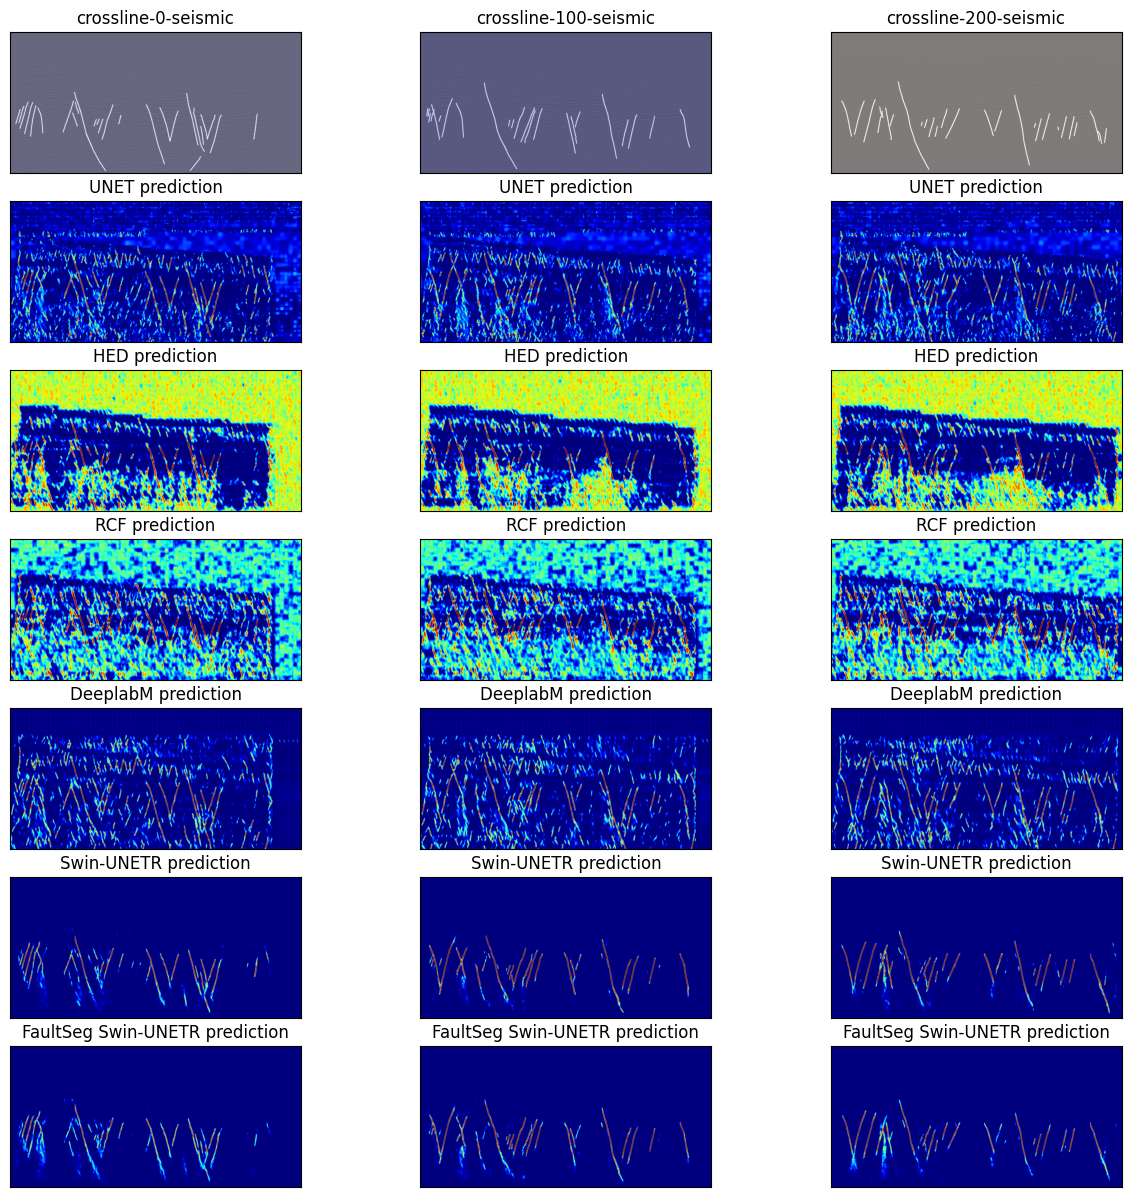

In [4]:
idxs = [0, 100, 200]
# idxs = [100, 200]
plt.rcParams["figure.figsize"] = (15, 15)
fig, ax=plt.subplots(7,len(idxs))
for col, idx in enumerate(idxs):
    ax[0, col].imshow(seis[idx, :, LOWER_BOUND:UPPER_BOUND].T, cmap='seismic')
    ax[0, col].imshow(gt[idx, :, LOWER_BOUND:UPPER_BOUND].T, cmap='gray', alpha=0.5)
    ax[0, col].axes.set_title(f'crossline-{idx}-seismic')
    ax[0, col].axes.xaxis.set_visible(False)
    ax[0, col].axes.yaxis.set_visible(False)
    
    ax[1, col].imshow(cv2.applyColorMap((anyu_unet_pred[idx, :, LOWER_BOUND:UPPER_BOUND].T*255).astype(np.uint8), cmapy.cmap('jet_r')))
    ax[1, col].axes.set_title(f'UNET prediction')
    ax[1, col].axes.xaxis.set_visible(False)
    ax[1, col].axes.yaxis.set_visible(False)
    
    ax[2, col].imshow(cv2.applyColorMap((anyu_hed_pred[idx, :, LOWER_BOUND:UPPER_BOUND].T*255).astype(np.uint8), cmapy.cmap('jet_r')))
    ax[2, col].axes.set_title(f'HED prediction')
    ax[2, col].axes.xaxis.set_visible(False)
    ax[2, col].axes.yaxis.set_visible(False)
    
    ax[3, col].imshow(cv2.applyColorMap((anyu_rcf_pred[idx, :, LOWER_BOUND:UPPER_BOUND].T*255).astype(np.uint8), cmapy.cmap('jet_r')))
    ax[3, col].axes.set_title(f'RCF prediction')
    ax[3, col].axes.xaxis.set_visible(False)
    ax[3, col].axes.yaxis.set_visible(False)
    
    ax[4, col].imshow(cv2.applyColorMap((anyu_deep_lab_pred[idx, :, LOWER_BOUND:UPPER_BOUND].T*255).astype(np.uint8), cmapy.cmap('jet_r')))
    ax[4, col].axes.set_title(f'DeeplabM prediction')
    ax[4, col].axes.xaxis.set_visible(False)
    ax[4, col].axes.yaxis.set_visible(False)
    
    ax[5, col].imshow(cv2.applyColorMap((swin_unetr_pred[idx, :, LOWER_BOUND:UPPER_BOUND].T*255).astype(np.uint8), cmapy.cmap('jet_r')))
    ax[5, col].axes.set_title(f'Swin-UNETR prediction')
    ax[5, col].axes.xaxis.set_visible(False)
    ax[5, col].axes.yaxis.set_visible(False)  
    
    ax[6, col].imshow(cv2.applyColorMap((faultseg_swin_pred[idx, :, LOWER_BOUND:UPPER_BOUND].T*255).astype(np.uint8), cmapy.cmap('jet_r')))
    ax[6, col].axes.set_title(f'FaultSeg Swin-UNETR prediction')
    ax[6, col].axes.xaxis.set_visible(False)
    ax[6, col].axes.yaxis.set_visible(False)
    
plt.show()

# Vis Sync Trained Thebe

In [10]:
seis = np.load('./Fault_data/public_data/precessed/test/seis/seistest.npy', mmap_mode='r')
gt = np.load('./Fault_data/public_data/precessed/test/fault/faulttest.npy', mmap_mode='r')

faultseg_swin_unetr_sync_trained_pred = np.load('MIM-Med3D/output/Fault_Finetuning/swin_unetr_base_multi_decoder_fusion_overall_simmim300e_p16_sync_flip_rotate_aug/thebe_pred/seistest_score.npy', mmap_mode='r')
swin_unetr_sync_trained_pred = np.load('MIM-Med3D/output/Fault_Finetuning/swin_unetr_base_simmim500e_p16_simulate_data_flip_rotate_aug_1x4/thebe_pred/seistest_score.npy', mmap_mode='r')

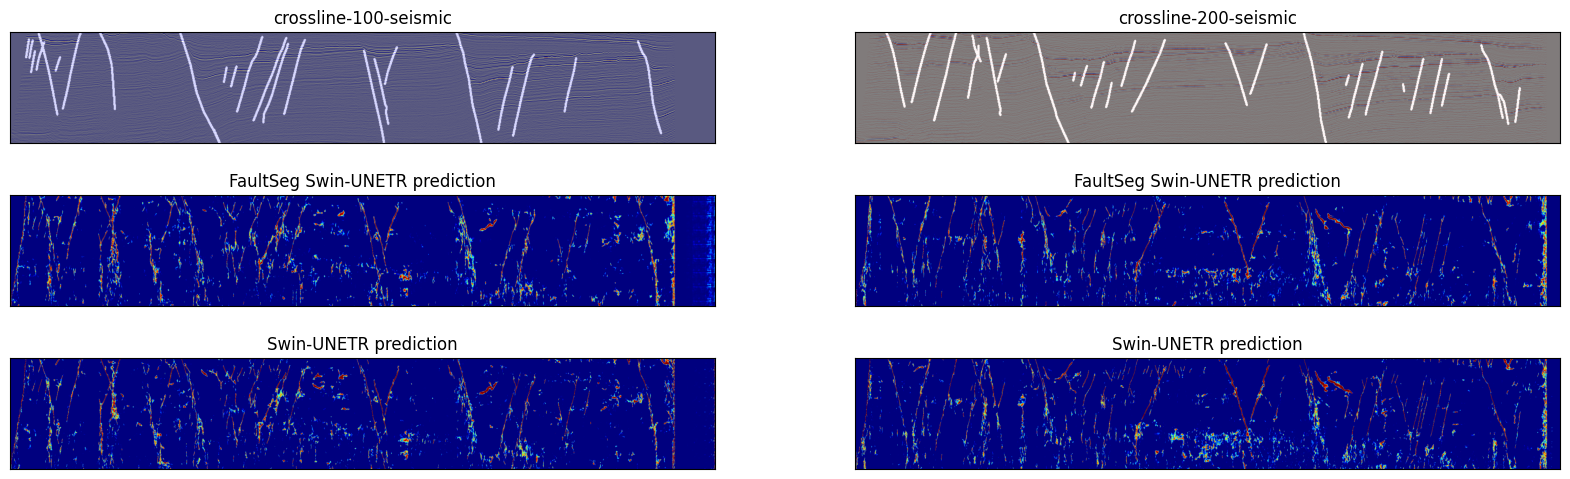

In [18]:
# idxs = [0, 100, 200]
idxs = [100, 200]
LOWER_BOUND = 800
UPPER_BOUND = 1300
plt.rcParams["figure.figsize"] = (20, 6)
fig, ax=plt.subplots(3,len(idxs))
for col, idx in enumerate(idxs):
    ax[0, col].imshow(seis[idx, :, LOWER_BOUND:UPPER_BOUND].T, cmap='seismic')
    ax[0, col].imshow(gt[idx, :, LOWER_BOUND:UPPER_BOUND].T, cmap='gray', alpha=0.5)
    ax[0, col].axes.set_title(f'crossline-{idx}-seismic')
    ax[0, col].axes.xaxis.set_visible(False)
    ax[0, col].axes.yaxis.set_visible(False)
    
    ax[1, col].imshow(cv2.applyColorMap((faultseg_swin_unetr_sync_trained_pred[idx, :, LOWER_BOUND:UPPER_BOUND].T*255).astype(np.uint8), cmapy.cmap('jet_r')))
    ax[1, col].axes.set_title(f'FaultSeg Swin-UNETR prediction')
    ax[1, col].axes.xaxis.set_visible(False)
    ax[1, col].axes.yaxis.set_visible(False)
    
    ax[2, col].imshow(cv2.applyColorMap((swin_unetr_sync_trained_pred[idx, :, LOWER_BOUND:UPPER_BOUND].T*255).astype(np.uint8), cmapy.cmap('jet_r')))
    ax[2, col].axes.set_title(f'Swin-UNETR prediction')
    ax[2, col].axes.xaxis.set_visible(False)
    ax[2, col].axes.yaxis.set_visible(False)
    
plt.show()

# Vis F3

In [6]:
seis = segyio.tools.cube('./Fault_data/OD-Servey/F3_Demo_2020/Export/1_Original_Seismics.sgy')
thined_fault_likelihood = segyio.tools.cube('./Fault_data/OD-Servey/F3_Demo_2020/Export/Fault_Likelihood_Thinned_from_DSMF_seis.sgy')

faultseg_swin_unetr_thebe_trained_pred = np.load('./MIM-Med3D/output/Fault_Finetuning/swin_unetr_base_multi_decoder_fusion_overall_simmim300e_p16_public_256_flip_rotate_aug_4x4/F3_Pred/1_Original_Seismics_score.npy', mmap_mode='r')
faultseg_swin_unetr_sync_trained_pred = np.load('MIM-Med3D/output/Fault_Finetuning/swin_unetr_base_multi_decoder_fusion_overall_simmim300e_p16_sync_flip_rotate_aug/F3_Pred/1_Original_Seismics_score.npy', mmap_mode='r')
swin_unetr_thebe_trained_pred = np.load('MIM-Med3D/output/Fault_Finetuning/swin_unetr_base_simmim500e_p16_public_256_flip_rotate_aug_4x4_rerun/F3_Pred/1_Original_Seismics_score.npy', mmap_mode='r')
swin_unetr_sync_pred = np.load('MIM-Med3D/output/Fault_Finetuning/swin_unetr_base_simmim500e_p16_simulate_data_flip_rotate_aug_1x4/F3_Pred/1_Original_Seismics_score.npy', mmap_mode='r')

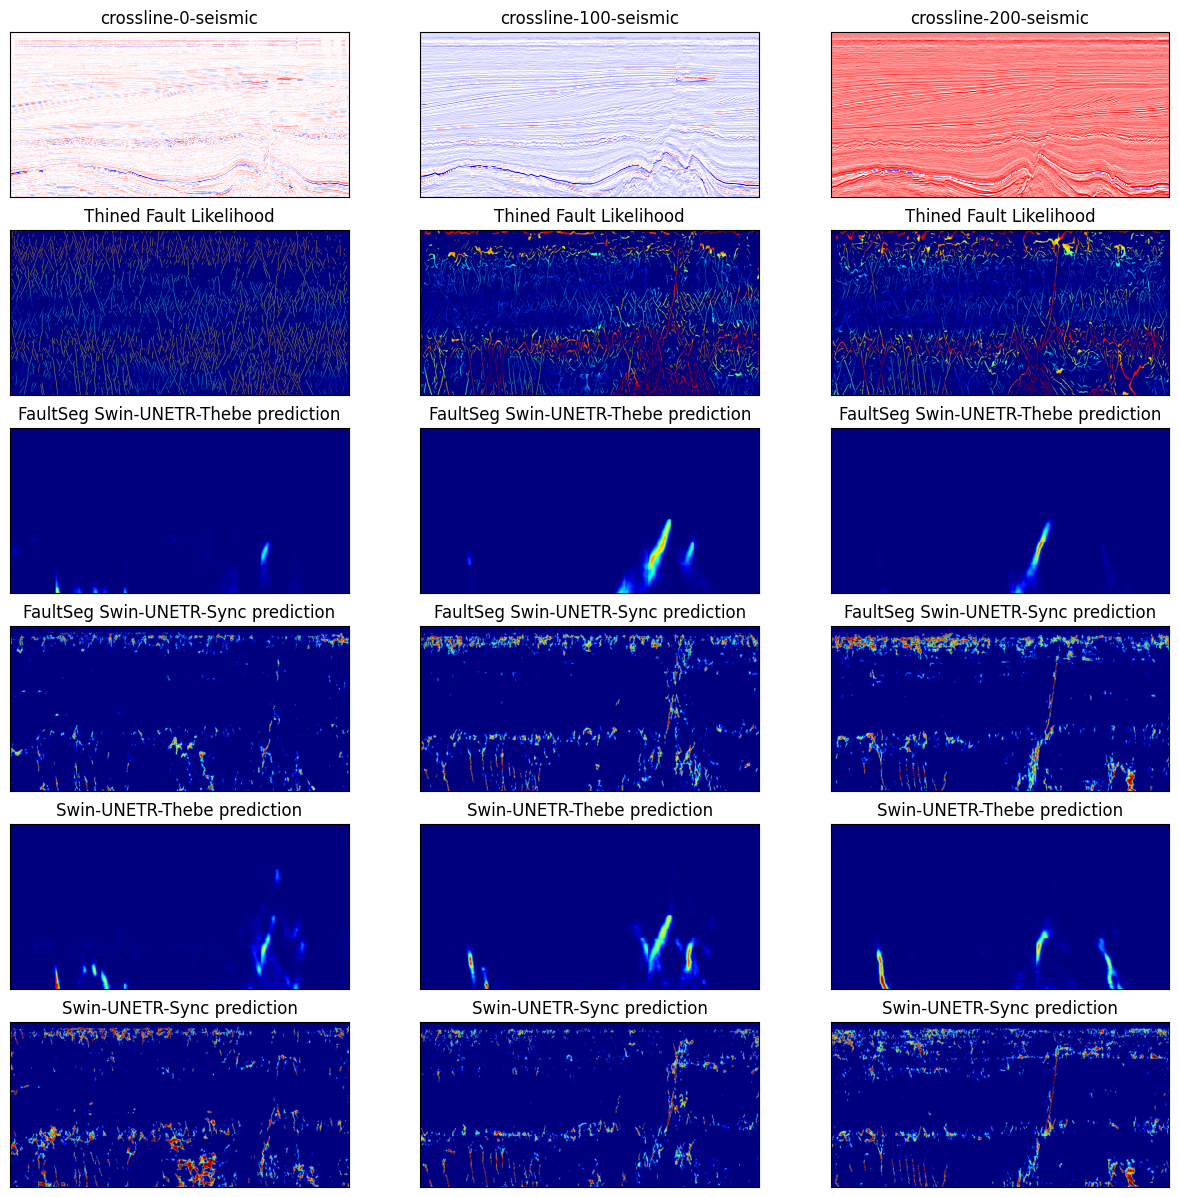

In [7]:
idxs = [0, 100, 200]
# idxs = [100, 200]
plt.rcParams["figure.figsize"] = (15, 15)
fig, ax=plt.subplots(6,len(idxs))
for col, idx in enumerate(idxs):
    ax[0, col].imshow(seis[idx, :, :].T, cmap='seismic')
    ax[0, col].axes.set_title(f'crossline-{idx}-seismic')
    ax[0, col].axes.xaxis.set_visible(False)
    ax[0, col].axes.yaxis.set_visible(False)
    
    ax[1, col].imshow(cv2.applyColorMap((thined_fault_likelihood[idx, :, :].T*255).astype(np.uint8), cmapy.cmap('jet_r')))
    ax[1, col].axes.set_title(f'Thined Fault Likelihood')
    ax[1, col].axes.xaxis.set_visible(False)
    ax[1, col].axes.yaxis.set_visible(False)
    
    ax[2, col].imshow(cv2.applyColorMap((faultseg_swin_unetr_thebe_trained_pred[idx, :, :].T*255).astype(np.uint8), cmapy.cmap('jet_r')))
    ax[2, col].axes.set_title(f'FaultSeg Swin-UNETR-Thebe prediction')
    ax[2, col].axes.xaxis.set_visible(False)
    ax[2, col].axes.yaxis.set_visible(False)
    
    ax[3, col].imshow(cv2.applyColorMap((faultseg_swin_unetr_sync_trained_pred[idx, :, :].T*255).astype(np.uint8), cmapy.cmap('jet_r')))
    ax[3, col].axes.set_title(f'FaultSeg Swin-UNETR-Sync prediction')
    ax[3, col].axes.xaxis.set_visible(False)
    ax[3, col].axes.yaxis.set_visible(False)
    
    ax[4, col].imshow(cv2.applyColorMap((swin_unetr_thebe_trained_pred[idx, :, :].T*255).astype(np.uint8), cmapy.cmap('jet_r')))
    ax[4, col].axes.set_title(f'Swin-UNETR-Thebe prediction')
    ax[4, col].axes.xaxis.set_visible(False)
    ax[4, col].axes.yaxis.set_visible(False)
    
    ax[5, col].imshow(cv2.applyColorMap((swin_unetr_sync_pred[idx, :, :].T*255).astype(np.uint8), cmapy.cmap('jet_r')))
    ax[5, col].axes.set_title(f'Swin-UNETR-Sync prediction')
    ax[5, col].axes.xaxis.set_visible(False)
    ax[5, col].axes.yaxis.set_visible(False) 
    
plt.show()